# Timescale Decomposition

Below is coded for studying timescale decomposition in Math 113B (UCI)
we will discuss one of examples of timescale decomposition
$$ \frac{dx}{dt} = \epsilon (y-x^3)$$
$$ \frac{dy}{dt} = x - y $$
Since $\epsilon$ is very small, the changes of y is faster than that of x.


In [1]:
# Import the relevant module
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import numpy as np
from scipy.integrate import odeint

## Phase Plane 

We will set up a parameter
$\epsilon = 0.01$




In [21]:
epsilon = 0.01
endtime = 100

def ode_system(X, t=0):
    # X[0] = x, X[1] = y
    x, y = X
    return np.array([epsilon * (y - (x**3)), x-y])

t = np.linspace(0,endtime, endtime*100)

# Initial value 
initial_value = np.array([5,-5])

Z = odeint(ode_system, initial_value, t)

x,y = Z.T

# Dynamics in Time
plt.plot(x, 'b-', label = r'x(t)')
plt.plot(y, 'r-', label = r'y(t)')
plt.xlabel("Time")
plt.ylabel("Population")
plt.grid()
plt.legend(loc="best")
plt.show()

# Phase Plane between x and y  
x,y = np.meshgrid(np.linspace(-6,6,10), np.linspace(-6,6,10))
u = ode_system([x,y], t)[0]
v = ode_system([x,y], t)[1]
quiv = plt.quiver(x,y,u,v,color='g')
plt.xlim((-6,6))
plt.ylim((-6,6))
xx = np.linspace(-6,6,1000)
plt.plot(xx,xx,'r--',label=r'$y=x$')
plt.plot(Z[:,0], Z[:,1], 'b--', label=r'initial condi. soln.')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.grid()
plt.show()



Traceback (most recent call last):
  File "/Users/bhsong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/bhsong/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/bhsong/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


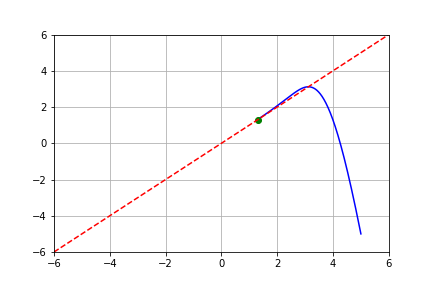

In [23]:
%matplotlib notebook

# Animation
fig, ax = plt.subplots()
line, = ax.plot([Z[0,0]],[Z[0,1]], 'b-')
point, = ax.plot([Z[0,0],Z[0,1]], 'go')
line.set_data(initial_value[0], initial_value[1])
point.set_data(Z[0,0],Z[0,1])
ax.grid()

def animate(i):
    point.set_data(Z[i,0],Z[i,1])
    line.set_data(Z[0:i,0],Z[0:i,1])
    return line,

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.plot(xx,xx,'r--')
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(Z)), interval=1)
plt.show()

## Steady States
To find steady states, I will use sympy library.

Assume $$\epsilon=0.01$$

In [4]:
# Find Steady States

import sympy as sm

epsilon=0.01

# Define system and this system has no negative value
x,y = sm.symbols('x,y')
x_prime = epsilon * (y - (x**3))
y_prime = x-y

XEqual = sm.Eq(x_prime,0)
YEqual = sm.Eq(y_prime,0)

steady_states = sm.solve( (XEqual, YEqual), x,y)

# Expected steady states (0,0), (1,1), (-1,-1)
print(f"Steady states are {steady_states[0]}, {steady_states[1]}, {steady_states[2]}")



Steady states are (-1.00000000000000, -1.00000000000000), (0.0, 0.0), (1.00000000000000, 1.00000000000000)


## Eigen Values
To get eigen values, We will use quadratic formula.
$$\begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}$$

$$ \lambda = (trace/2) \pm \sqrt{trace^2 / 4 + \delta} $$
$$trace = a_{11} + a_{22}$$
$$\Delta = a_{11} a_{22} - a_{12} a_{21} $$

But, I will use sympy library.

Assume $$\epsilon = 0.01$$
We already know that steady states are $(-1,-1), (0,0), (1,1)$

If all real part of eigenvalues is negative, the steady state is stable. 

In [5]:
eq_mat = sm.Matrix([x_prime, y_prime])
mat = sm.Matrix([x,y])
jacobian_mat = eq_mat.jacobian(mat)

print(f'Jacobian is {jacobian_mat}')
print('----------------------------------------------------------------------------------')
      
for state in steady_states:
    eq_mat = jacobian_mat.subs([ (x, state[0]), (y, state[1]) ])
    print(f"The eigenvalues for the steady state ({int(state[0])},{int(state[1])}) ", end="")
    print(f"is {list(eq_mat.eigenvals().keys())}")
    lambda1, lambda2 = list(eq_mat.eigenvals().keys())
    if (lambda1 < 0) & (lambda2 <0):
        print(f"It is stable steady state")
    else:
        print(f"It is unstable steady state")
    print('----------------------------------------------------------------------------------')


Jacobian is Matrix([[-0.03*x**2, 0.0100000000000000], [1, -1]])
----------------------------------------------------------------------------------
The eigenvalues for the steady state (-1,-1) is [-103/200 - sqrt(9809)/200, -103/200 + sqrt(9809)/200]
It is stable steady state
----------------------------------------------------------------------------------
The eigenvalues for the steady state (0,0) is [-sqrt(26)/10 - 1/2, -1/2 + sqrt(26)/10]
It is unstable steady state
----------------------------------------------------------------------------------
The eigenvalues for the steady state (1,1) is [-103/200 - sqrt(9809)/200, -103/200 + sqrt(9809)/200]
It is stable steady state
----------------------------------------------------------------------------------
